### BISNIS PROBLEM

Asuransi perjalanan adalah jenis asuransi yang memberikan perlindungan selama kita melakukan perjalanan baik dalam negeri maupun luar negeri. Beberapa negara bahkan telah mewajibkan para pelancong untuk memiliki asuransi perjalanan, misalnya negara-negara di Eropa dan Amerika. Besarnya premi tergantung pada cakupan yang diinginkan, lama perjalanan, dan tujuan perjalanan. 

Suatu perusahaan yang bergerak di bidang asuransi perjalanan ingin mengetahui pemegang polis yang akan mengajukan klaim asuransi untuk pertanggungan. Data pemegang polis pada perusahaan asuransi merupakan data historis yang terdiri dari destinasi, produk asuransi, dan sebagainya.

Perusahaan asuransi mendasarkan bisnis mereka pada asumsi dan asumsi risiko. Mereka menghasilkan pendapatan dengan membebankan premi kemudian menginvestasikan premi tersebut di aset penghasil bunga lainnya. Untuk menghasilkan keuntungan, perusahaan asuransi memastikan bahwa premi yang mereka tetapkan lebih besar daripada klaim apa pun di masa mendatang.

Target : 
- 0 : Tidak diklaim 
- 1 : Diklaim

### PROBLEM STATEMENT

Perusahaan asuransi perjalanan ingin memprediksi pemegang polis mana yang kemungkinan akan mengajukan klaim asuransi untuk pertanggungan, agar dapat mengidentifikasi dan mengurangi potensi kerugian secara proaktif.

### GOALS

Dengan menggunakan classification model machine learning, perusahaan dapat menganalisis data riwayat pemegang polis seperti produk asuransi, dan detail perjalanan untuk memprediksi secara akurat pemegang polis mana yang memiliki risiko lebih tinggi untuk mengajukan klaim. Hal ini akan memungkinkan perusahaan untuk mengambil tindakan pencegahan untuk kompensasi biaya klaim dan meningkatkan kinerja keuangan secara keseluruhan.

### ANALYTIC APPROACH

Selanjutnya adalah menganalisis data untuk menemukan pola dari fitur-fitur yang ada untuk membedakan pemegang polis yang mengajukan klaim dan yang tidak.
Kemudian membangun model klasifikasi yang akan membantu perusahaan memprediksi apakah pemegang polis akan mengajukan klaim atau tidak.

### MATRIX EVALUATION

Berdasarkan tujuan diatas, model tersebut harus baik dalam memprediksi pemegang polis yang akan mengajukan klaim di masa depan. Jadi dalam hal ini kita perlu mengurangi jumlah false positive rate, artinya kita akan kehilangan lebih banyak uang jika model memprediksi pemegang polis yang tidak mengklaim tetapi sebenarnya mereka mengklaim sehingga precision skor akan menjadi metrik evaluasi kali ini.

Type 1 error : False Positive
- Konsekuensi : Perusahaan tidak dapat membebankan premi/biaya lebih kepada pemegang polis yang pada kenyataannya mengajukan klaim di masa mendatang tetapi diprediksikan "tidak akan mengklaim" oleh model tersebut. Yang berarti perusahaan kehilangan uang.

Type 2 error : False Negative
- Konsekuensi : Membebankan biaya diluar premi kepada pemegang polis yang kemungkinan besar tidak akan mengajukan klaim di masa depan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

#Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from scikitplot.metrics import plot_roc_curve

Features
-	Agency: Nama agency.
-	Agency Type: Tipe agensi asuransi travel.
-	Distribution Channel: Channel agensi asuransi travel.
-	Product Name: Nama produk asuransi travel.
-	Gender: Jenis Kelamin.
-	Duration: Durasi Perjalanan.
-	Destination: Tujuan Perjalanan.
-	Net Sales: Banyak nominal Penjualan polis asuransi perjalanan.
-	Commission (in value): Komisi yang diterima agensi asuransi travel.
-	Age: Umur.
-	Claim: Status Klaim.


In [2]:
# Read data
df = pd.read_csv('data_travel_insurance.csv')
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No


In [3]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600
std,109.153961,48.661970,19.625637,13.954926
min,-1.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.500000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


## DATA CLEANING

Pada tahap ini, akan dilakukan pembersihan data, selanjutnya data yang sudah bersih akan digunakan untuk proses analisis selanjutnya. 


### Missing Value

Ada data yang hilang/kosong di kolom gender, maka kita akan memperbaiki semua datanya dan membuatnya menjadi siap pakai untuk melakukan analisa terhadap masalahnya dan juga pembuatan model machine learningnya.

In [5]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Agency,object,0,0.00,16,"[CSR, RAB]"
1,Agency Type,object,0,0.00,2,"[Travel Agency, Airlines]"
2,Distribution Channel,object,0,0.00,2,"[Online, Offline]"
3,Product Name,object,0,0.00,26,"[Bronze Plan, Travel Cruise Protect]"
4,Gender,object,31647,71.39,2,"[nan, M]"
5,Duration,int64,0,0.00,437,"[242, 208]"
6,Destination,object,0,0.00,138,"[DENMARK, CZECH REPUBLIC]"
7,Net Sales,float64,0,0.00,1006,"[443.3, 320.25]"
8,Commision (in value),float64,0,0.00,915,"[15.44, 20.88]"
9,Age,int64,0,0.00,89,"[4, 88]"


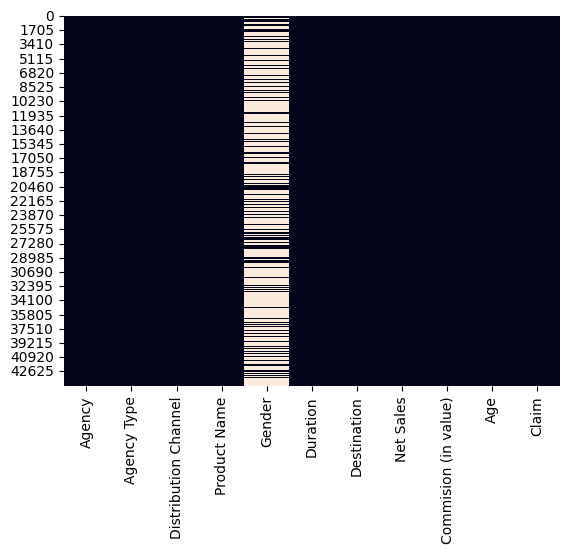

In [6]:
sns.heatmap(df.isnull(), cbar=False);
plt.show()


In [7]:
# Cek Jumlah Null Values
df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Gender                  31647
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Age                         0
Claim                       0
dtype: int64

In [8]:
import random

# Mengisi data null pada kolom gender dengan nilai 'M' dan 'F' secara random

df['Gender'].fillna(value=random.choice(['M', 'F']), inplace=True)

In [9]:
df.isnull().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Gender                  0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
Claim                   0
dtype: int64

In [10]:
df['Gender'].value_counts()

F    37824
M     6504
Name: Gender, dtype: int64

### Duplicated

In [11]:
# Mencari nilai duplikat pada dataframe
df.duplicated().sum()

4676

In [12]:
# Menghapus data duplikat
df.drop_duplicates(keep='first', inplace=True)

In [13]:
df.duplicated().sum()

0

### Outlier

Data Outlier disebut juga dengan data pencilan. Pengertian dari Outlier adalah data observasi yang muncul dengan nilai-nilai ekstrim, baik secara univariat ataupun multivariat. Yang dimaksud dengan nilai-nilai ekstrim dalam observasi adalah nilai yang jauh atau beda sama sekali dengan sebagian besar nilai lain dalam kelompoknya. Adanya nilai ekstrem dapat berdampak signifikan pada kesimpulan hasil interpretasi yang kita amati dari data atau model machine learning.

In [14]:
def outlier(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    lower_outlier = q1 - (iqr * 1.5)
    upper_outlier = q3 + (iqr * 1.5)

    outliers = x[(x < lower_outlier) | (x > upper_outlier)]
    return outliers

In [15]:
cek_ouliers = {}
for num_feature in df.select_dtypes(['float','int']):
    outliers = outlier(df[num_feature])
    if len(outliers):
        print(f"-> {num_feature} memiliki {len(outliers)} outlier")
        cek_ouliers[num_feature] = outliers
    else:
        print(f"-> {num_feature} tidak memilik outlier.")
        cek_ouliers[num_feature] = None

-> Duration memiliki 3495 outlier
-> Net Sales memiliki 3597 outlier
-> Commision (in value) memiliki 4084 outlier
-> Age memiliki 2300 outlier


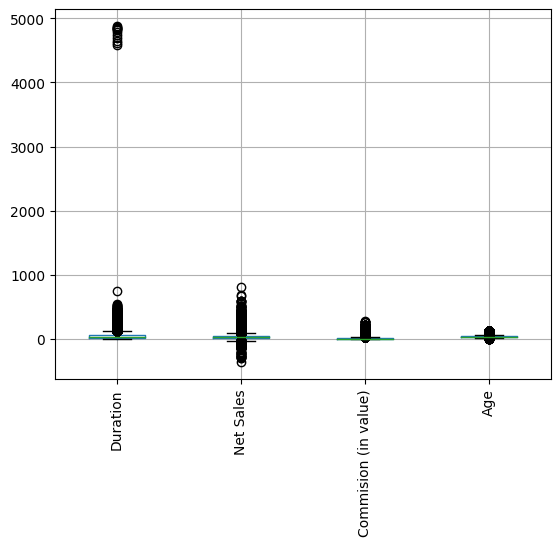

In [16]:
# Visualisasi data outlier menggunakan boxplot
df.boxplot(rot=90)
plt.show()

Berdasar grafik diatas dapat dilihat ada beberapa feature yang memiliki outlier, untuk kasus kali ini outlier yang akan dihilangkan yang memiliki nilai ekstrem dibanding data lain yaitu kolom duration

In [17]:
# Melakukan penghapusan data Outliers ekstrim dari kolom Duration

df= df.drop(df[df['Duration'] >= 4000].index) 

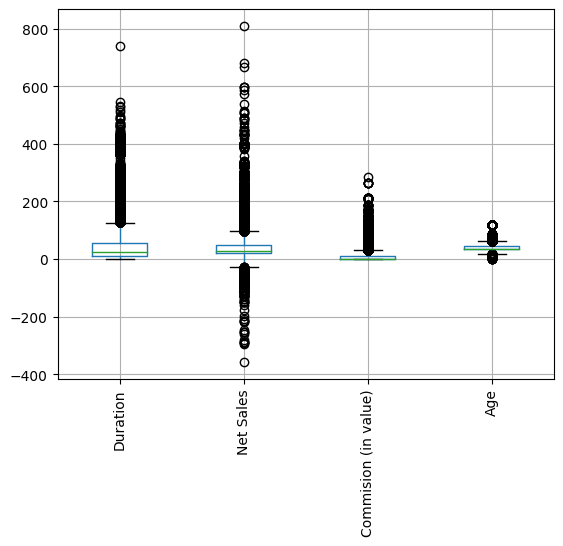

In [18]:
df.boxplot(rot=90)
plt.show()

## DATA ANALYSIS

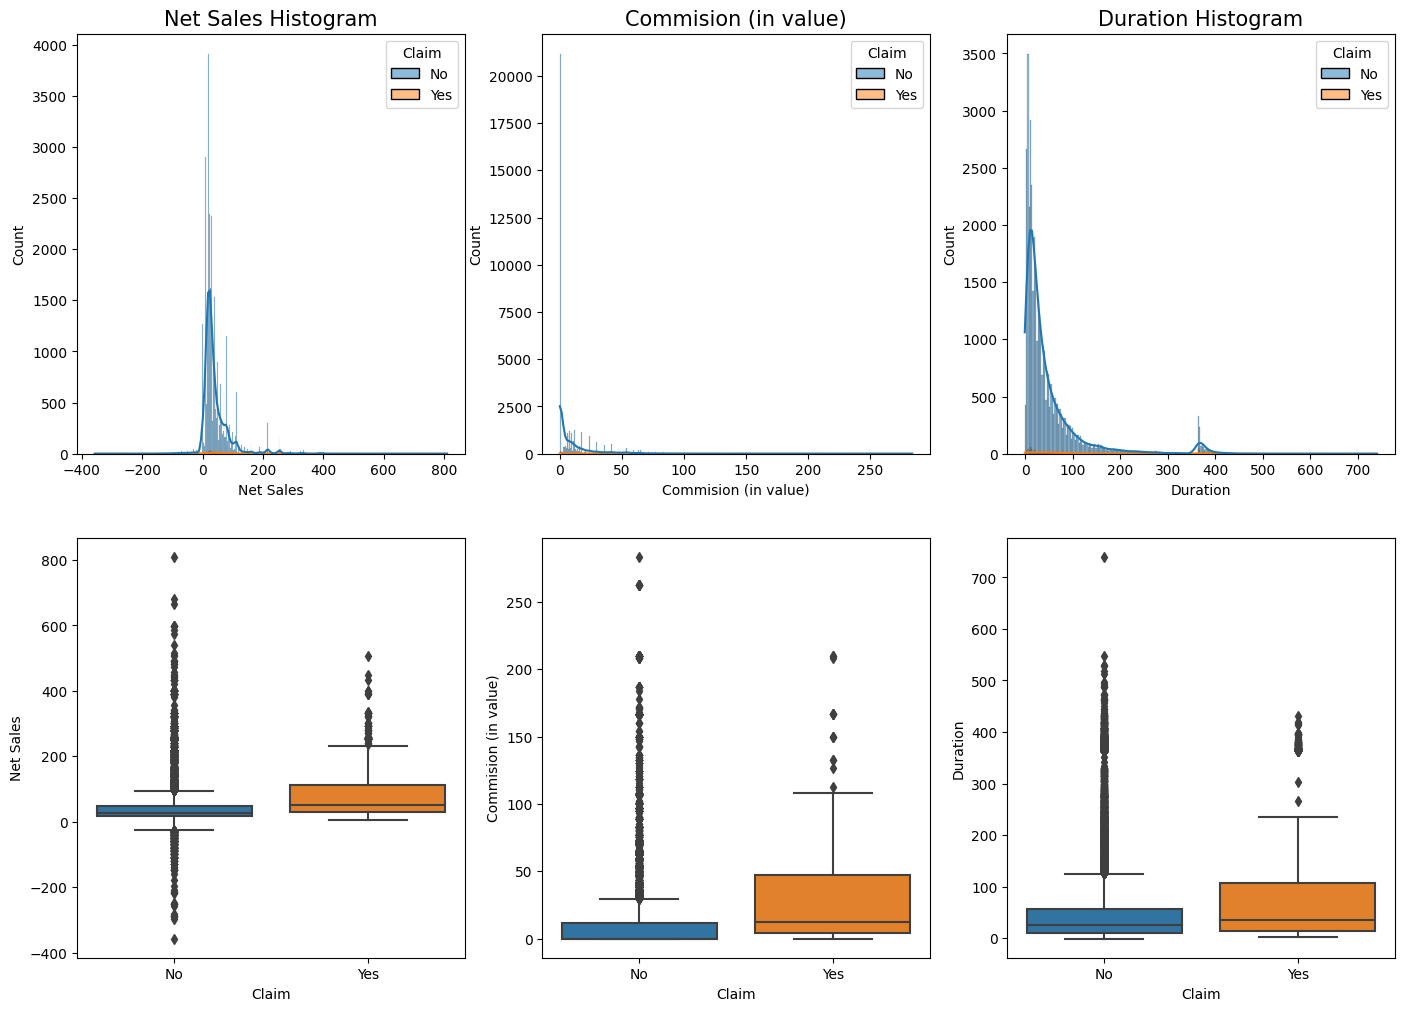

In [19]:
plt.figure(figsize=(17,12))

plt.subplot(231)
sns.histplot(data=df,x='Net Sales',hue='Claim',kde=True)
plt.title('Net Sales Histogram',fontsize=15)


plt.subplot(232)
sns.histplot(data=df,x='Commision (in value)',hue='Claim',kde=True)
plt.title('Commision (in value)',fontsize=15)

plt.subplot(233)
sns.histplot(data=df,x='Duration',hue='Claim',kde=True)
plt.title('Duration Histogram',fontsize=15)

plt.subplot(234)
sns.boxplot(data=df,y='Net Sales', x='Claim')

plt.subplot(235)
sns.boxplot(data=df,y='Commision (in value)', x='Claim')

plt.subplot(236)
sns.boxplot(data=df,y='Duration', x='Claim')
plt.show()

Berdasarkan histogram dan boxplot diatas, kita dapat menyimpulkan bahwa terlihat perbedaan distribusi `Commision (in value)`, `Duration`, `Net Sales` dari `Claim` yang `Yes` dan `Claim` yang `No`, dimana yang nilai median `Yes` lebih tinggi dari yang `No`.

Sedangkan data outlier dari masing-masing data `Commision (in value)`, `Duration`, `Net Sales` paling banyak terdapat pada data `Claim` yang `No`

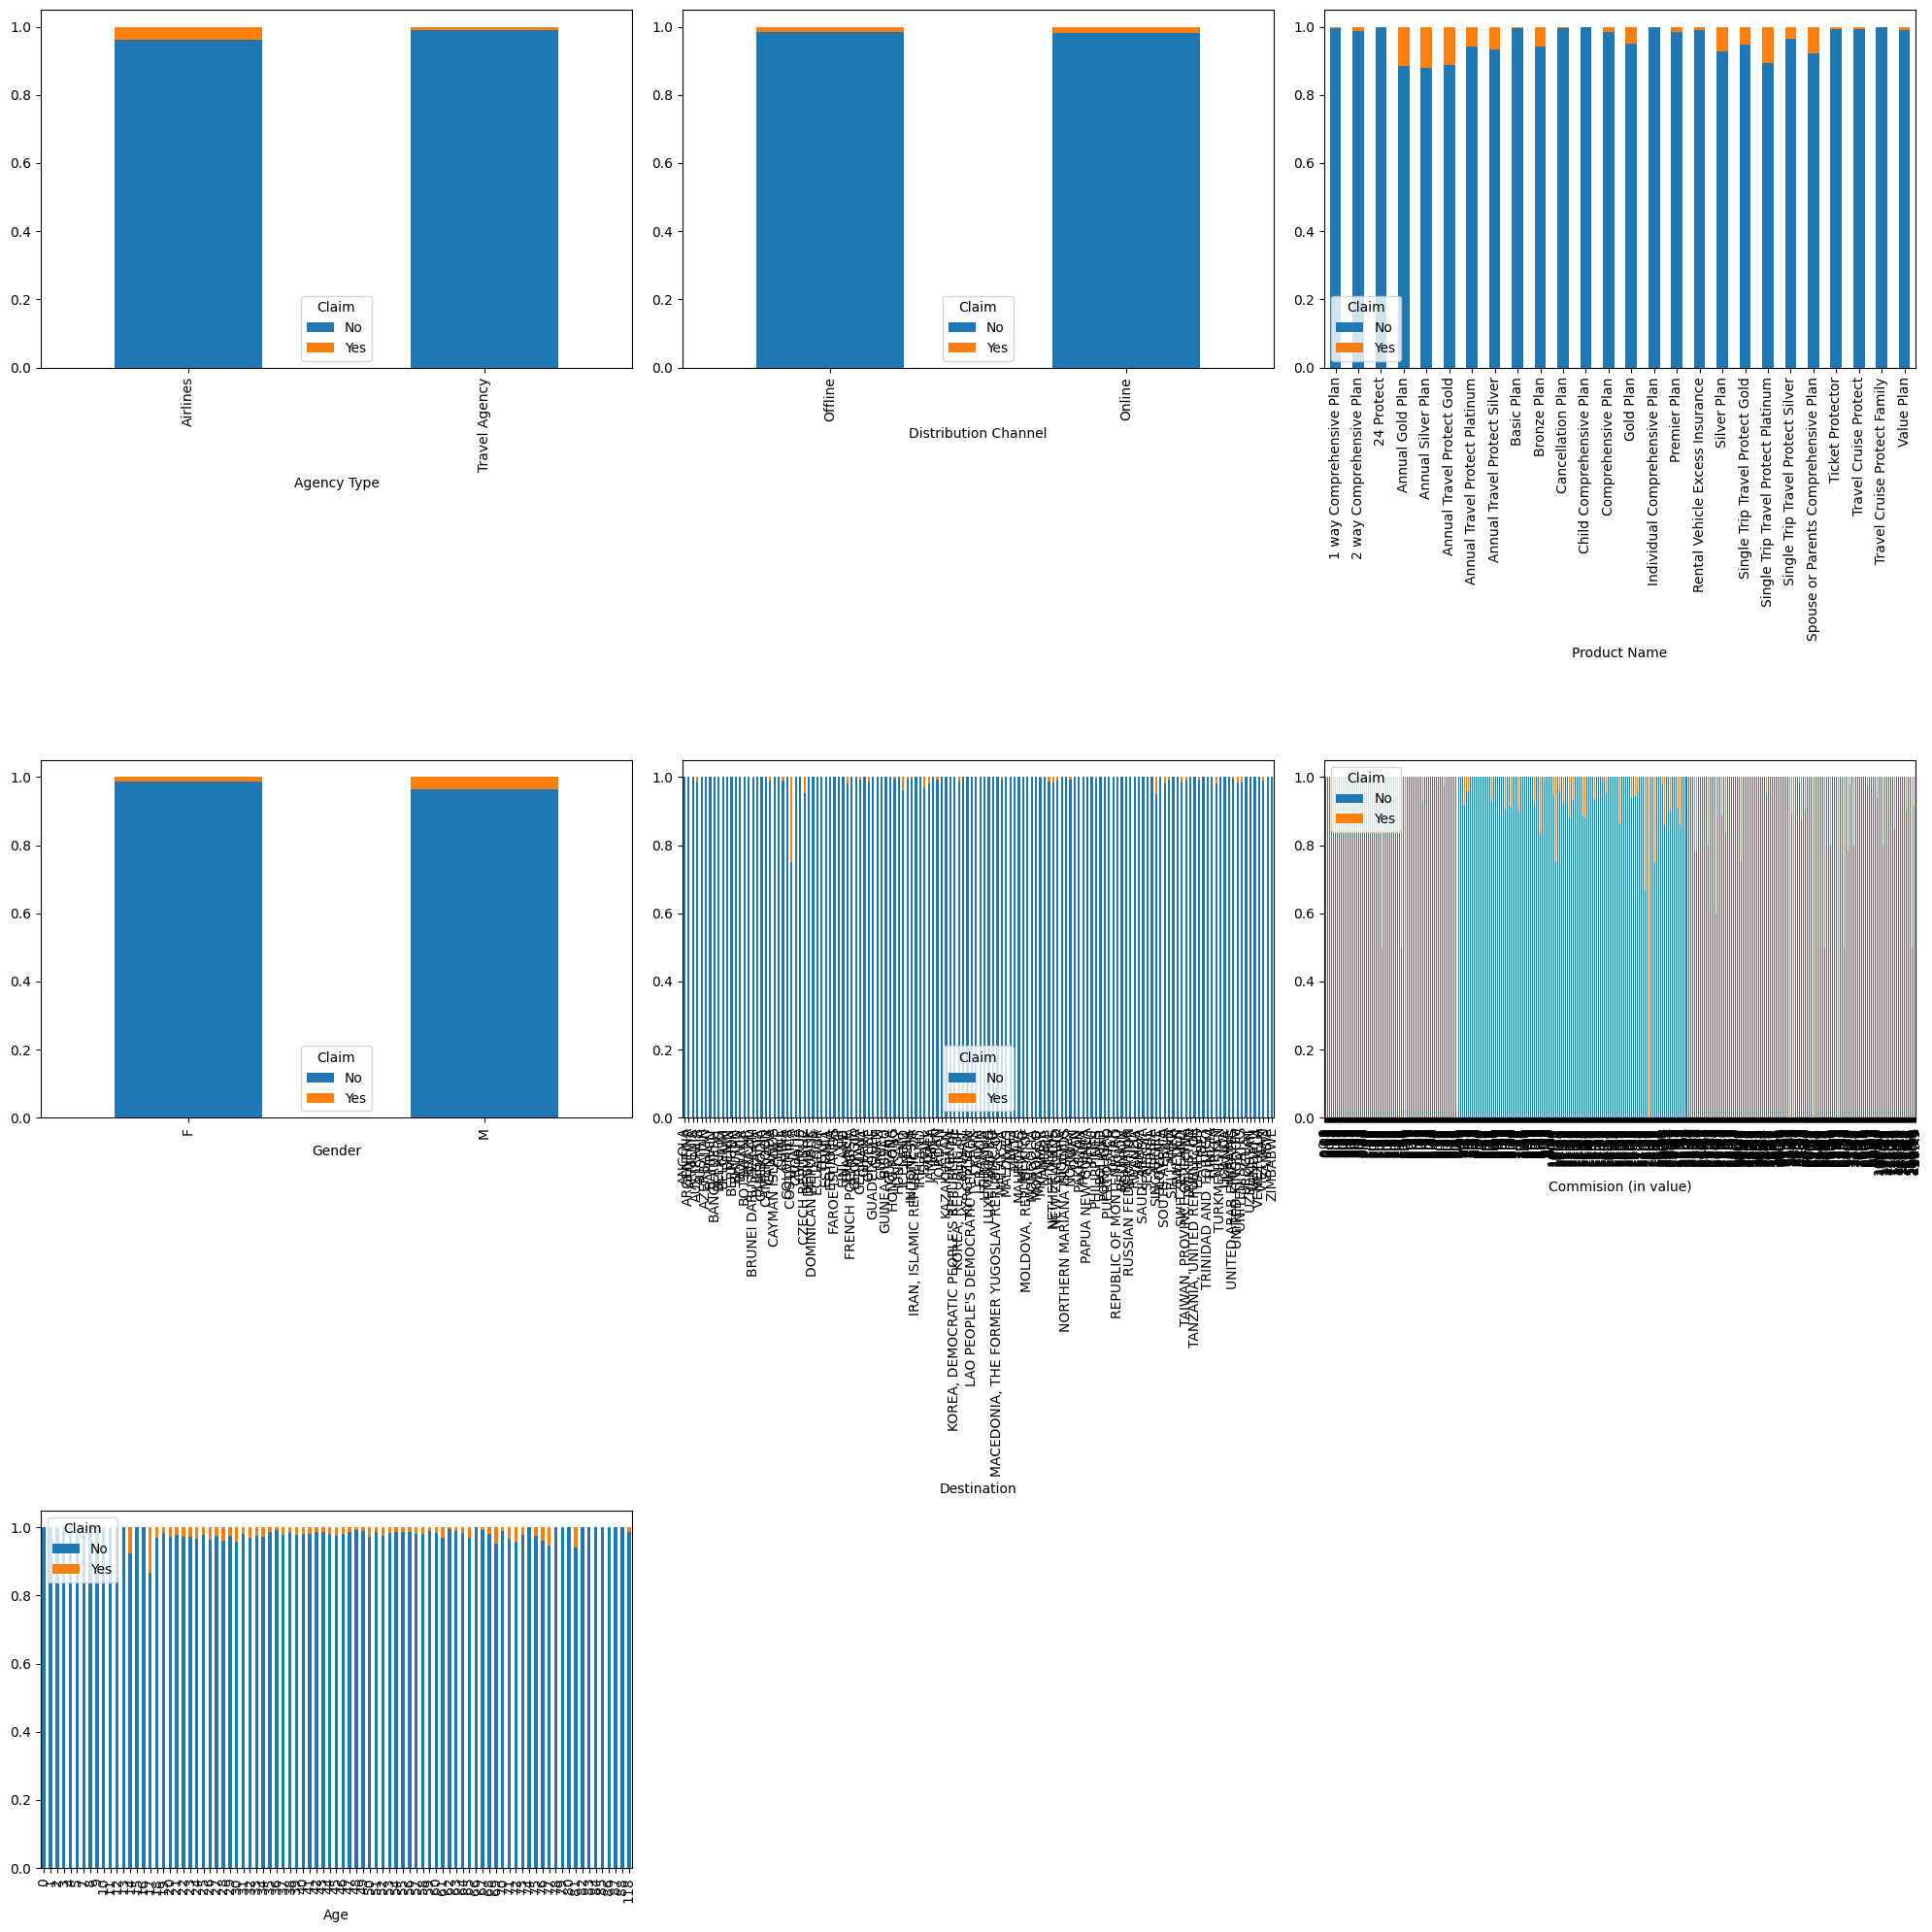

In [20]:
count = 0
fig = plt.figure(figsize=(20,20))

for i in df.drop(columns=['Claim','Agency','Duration','Net Sales']).columns:
    count +=1
    ax= plt.subplot(3,3, count)
    pd.crosstab(df[i],df['Claim'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
    fig.tight_layout()

plt.show()

In [21]:
for i in df.drop(columns=['Claim','Agency','Duration','Net Sales']).columns:
    claim_df = df.groupby(i)['Claim'].value_counts(normalize=True).unstack()
    display(claim_df.sort_values(by=['Yes'], ascending=False))

Claim,No,Yes
Agency Type,,
Airlines,0.962010,0.037990
Travel Agency,0.991541,0.008459


Claim,No,Yes
Distribution Channel,,
Online,0.982935,0.017065
Offline,0.984932,0.015068


Claim,No,Yes
Product Name,,
Annual Silver Plan,0.879599,0.120401
Annual Gold Plan,0.884058,0.115942
Annual Travel Protect Gold,0.888889,0.111111
Single Trip Travel Protect Platinum,0.893617,0.106383
Spouse or Parents Comprehensive Plan,0.923077,0.076923
Silver Plan,0.928191,0.071809
Annual Travel Protect Silver,0.932203,0.067797
Bronze Plan,0.940765,0.059235
Annual Travel Protect Platinum,0.941176,0.058824


Claim,No,Yes
Gender,,
M,0.963780,0.036220
F,0.986444,0.013556


Claim,No,Yes
Destination,,
COSTA RICA,0.750000,0.250000
SINGAPORE,0.949709,0.050291
CZECH REPUBLIC,0.953488,0.046512
ICELAND,0.961538,0.038462
ISRAEL,0.969697,0.030303
...,...,...
UZBEKISTAN,1.000000,NaN
VANUATU,1.000000,NaN
VENEZUELA,1.000000,NaN


Claim,No,Yes
Commision (in value),,
34.38,NaN,1.0
67.75,NaN,1.0
2.00,NaN,1.0
43.06,NaN,1.0
64.38,NaN,1.0
...,...,...
186.71,1.0,NaN
208.16,1.0,NaN
209.95,1.0,NaN


Claim,No,Yes
Age,,
17,0.866667,0.133333
14,0.923077,0.076923
81,0.941176,0.058824
77,0.947368,0.052632
69,0.952756,0.047244
...,...,...
84,1.000000,NaN
85,1.000000,NaN
86,1.000000,NaN


Berdasarkan barplot dan table diatas kita dapat menyimpulkan beberapa hal :

1. Dari data kedua tipe Agency yaitu `Airline` maupun `Travel Agency` keduanya mempunyai presentase yang tinggi dalam menolak klaim asuransi
2. Berdasar data kolom `Distribution Channel` polis asuransi baik `online` maupun `offline` mempunyai kecenderungan dalam menolak klaim yang tinggi
3. Berdasar data kolom `Product Name`, produk `Annual Silver Plan`,	`Annual Gold Plan`, `Annual Travel Protect Gold`, `Single Trip Travel Protect Platinum` mempunyai presentase dalam menerima klaim asuransi diatas 10%, sedangkan produk `24 Protect`, `Child Comprehensive Plan`, `Individual Comprehensive Plan`,	
`Travel Cruise Protect Family` memiliki presentase menolak klaim sebanyak 100%
4. Berdasar data kolom `Gender`, jenis kelamin Laki-laki `M` memiliki presentase lebih tinggi daripada Perempuan `F` dalam memperoleh klaim asuransi 
5. Berdasar data kolom `Destination`, tempat tujuan perjalanan dari polis asuransi yang menerima klaim tinggi yaitu `COSTA RICA` sebesar 25%, disusul
`SINGAPORE` sebesar 5%
6. Berdasar data kolom `Commision (in value)`, komisi dibawah 100 memiliki presentase menerima klaim yang lebih tinggi daripada komisi diatas 100
7. Untuk data kolom `Age`, untuk memperoleh klaim dari polis asuransi tidak terpatok dengan umur, dibuktikan dengan tingkat presentase umur tertinggi yang memperoleh klaim yaitu umur 14 tahun , disusul umur 17 dan 81 tahun.


Sekarang mari kita lihat juga untuk kolom `Agency`, apakah terlihat perbedaan dalam menerima atau menolak klaim antar agensi yang mengeluarkan polis asuransi.

In [22]:
# Mengelompokkan kolom Agency dan Claim yang diurutkan berdasar kolom Claim 
agency_df = df.groupby('Agency')['Claim'].value_counts(normalize=True).unstack()
agency_df['count'] = df.groupby('Agency')['Claim'].count()
display(agency_df.sort_values(by='Yes', ascending=False).head(16))


Claim,No,Yes,count
Agency,,,
C2B,0.926270,0.073730,5493
LWC,0.935982,0.064018,453
KML,0.979920,0.020080,249
CCR,0.982906,0.017094,117
TTW,0.984848,0.015152,66
CSR,0.985294,0.014706,68
CBH,0.985507,0.014493,69
JWT,0.988060,0.011940,335
CWT,0.988823,0.011177,5726


Dari tabel diatas dapat disimpulkan bahwa :
1. `Agency` dengan presentase paling tinggi menerima klaim yaitu `C2B` disusul `LWC`
2. Ada dua `Agency` yang tidak menerima klaim sama sekali yaitu Agensi `ADM` dan `ART`
3. `Agency` yang paling banyak mengeluarkan polis asuransi yaitu `EPX` dengan jumlah 20990 polis, disusul `CWT` dan `C2B` masing-masing sebesar 5726 dan 5493 polis asuransi

## DATA PREPARATION

In [23]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,F,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,F,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


Sekarang mari kita melakukan fitur encoding untuk fitur2 categorical yang kita miliki.
Yang akan kita lakukan adalah :

1. Merubah kolom `Claim` yang berisi data `Yes` dan `No` menjadi masing masing 1 dan 0 
2. Merubah fitur/kolom `Agency` menggunakan Binary Encoding, karena fitur ini memiliki unique data yang banyak dan tidak memiliki urutan/tidak ordinal, bila kita menggunakan One Hot Encoding akan terlalu banyak fitur baru yg terbuat, dan kalau kita menggunakan Ordinal/Label Encoding hasilnya dapat kurang cocok/kurang baik. Oleh karena itu kita akan mencoba menggunakan Binary Encoding saja.
3. Merubah fitur/kolom `Agency Type` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
4. Merubah fitur/kolom `Distribution Channel` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
5. Merubah fitur/kolom `Product Name` menggunakan Binary Encoding, karena fitur ini memiliki unique data yang banyak dan tidak memiliki urutan/tidak ordinal, bila kita menggunakan One Hot Encoding akan terlalu banyak fitur baru yg terbuat, dan kalau kita menggunakan Ordinal/Label Encoding hasilnya dapat kurang cocok/kurang baik. Oleh karena itu kita akan mencoba menggunakan Binary Encoding saja.
6. Merubah fitur/kolom `Gender` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
7. Merubah fitur/kolom `Destination` menggunakan Binary Encoding, karena fitur ini memiliki unique data yang banyak dan tidak memiliki urutan/tidak ordinal, bila kita menggunakan One Hot Encoding akan terlalu banyak fitur baru yg terbuat, dan kalau kita menggunakan Ordinal/Label Encoding hasilnya dapat kurang cocok/kurang baik. Oleh karena itu kita akan mencoba menggunakan Binary Encoding saja.


In [24]:
# Merubah Yes = 1, No = 0, pada kolom Claim
df['Claim'] = df['Claim'].map({'Yes':1, 'No':0})

In [25]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Agency Type','Distribution Channel', 'Gender']),
    ('binary', ce.BinaryEncoder(), ['Agency', 'Product Name', 'Destination'])
], remainder='passthrough')

In [26]:
x = df.drop(columns=['Claim'], axis=1)
y = df['Claim']

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=2021)

## Modeling & Evaluation

In [28]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

### Model Benchmarking : K-Fold

In [48]:
# Cross validation

# Models
models = [logreg,knn,dt,rf,xgb,lgbm]

score_precision = []
mean_precision = []
std_precision = []

# Loop every models for each metrics
for i in models:

    crossval = StratifiedKFold(n_splits= 5)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])

    # precision
    model_cv_precision = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv= crossval,
        scoring= 'precision')

    # print(model_cv_precision, i)

    score_precision.append(model_cv_precision)
    mean_precision.append(model_cv_precision.mean())
    std_precision.append(model_cv_precision.std())

precision_before_tuning = pd.DataFrame({'model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],'mean precision': mean_precision, 'std': std_precision}).set_index('model').sort_values(by= 'mean precision', ascending= False)
precision_before_tuning

,mean precision,std
model,,
KNN,0.095238,0.131277
Random Forest,0.059154,0.037469
Decision Tree,0.058731,0.018908
XGBoost,0.050000,0.100000
Logistic Regression,0.000000,0.000000
LightGBM,0.000000,0.000000


Terlihat bahwa model KNN adalah yang terbaik untuk mean precisionnya dari setiap model yang menggunakan default hyperparameter.

### Model Benchmarking : Test Data

In [47]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score_precision = []

def y_pred_function(i):
    estimator= Pipeline([
        ('preprocess', transformer),
        ('model', i)])
    x_train, x_test
    
    estimator.fit(x_train, y_train)
    return(estimator, estimator.predict(x_test), x_test)

for i, j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']):
    estimator, y_pred, x_test = y_pred_function(i)
    print(j,'\n', classification_report(y_test, y_pred))

Logistic Regression 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      7793
           1       0.00      0.00      0.00       135

    accuracy                           0.98      7928
   macro avg       0.49      0.50      0.50      7928
weighted avg       0.97      0.98      0.97      7928

KNN 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      7793
           1       0.12      0.01      0.01       135

    accuracy                           0.98      7928
   macro avg       0.55      0.50      0.50      7928
weighted avg       0.97      0.98      0.97      7928

Decision Tree 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      7793
           1       0.08      0.11      0.09       135

    accuracy                           0.96      7928
   macro avg       0.53      0.54      0.54      7928
weighted avg       0.97      0

Dengan test data XGBoost mempunyai performance terbaik tapi dengan precision score hanya 0.20

Karena data memiliki imbalance yang cukup tinggi, maka selanjutnya akan dilakukan undersampling dan oversampling pada dataset lalu membandingkannya yang kemudian akan dipakai untuk proses analisis selanjutnya. 

### Random Under Sampling

In [49]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy= 1)

x_rus, y_rus = rus.fit_resample(x, y)


In [50]:
x_train_rus, x_test_rus, y_train_rus, y_test_rus= train_test_split(
    x_rus,
    y_rus,
    stratify= y_rus,  
    test_size= 0.2,
    random_state= 2021)

In [51]:
# Cross validation With balanced data

# Models
models = [logreg, knn, dt, rf]

score_precision = []
mean_precision = []
std_precision = []

# Loop every models for each metrics
for i in models:

    crossval = StratifiedKFold(n_splits= 5)

    pipe = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])

    # precision
    model_cv_precision = cross_val_score(
        pipe, 
        x_train_rus, 
        y_train_rus, 
        cv= crossval,
        scoring= 'precision')

    # print(model_cv_precision, i)

    score_precision.append(model_cv_precision)
    mean_precision.append(model_cv_precision.mean())
    std_precision.append(model_cv_precision.std())

precision_rus = pd.DataFrame({'model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest'],'mean precision': mean_precision, 'std': std_precision}).set_index('model').sort_values(by= 'mean precision', ascending= False)
precision_rus

,mean precision,std
model,,
Logistic Regression,0.770920,0.033693
Random Forest,0.728275,0.036426
KNN,0.681584,0.024757
Decision Tree,0.639990,0.027297


### Random Over Sampling

In [61]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy= 'minority')

x_ros, y_ros = ros.fit_resample(x, y)


In [62]:
# Train test split with balanced data

x_train_ros, x_test_ros, y_train_ros, y_test_ros= train_test_split(
    x_ros,
    y_ros,
    stratify= y_ros,  
    test_size= 0.2,
    random_state= 2021)

In [63]:
# Cross validation With balanced data

# Models
models = [logreg, knn, dt, rf]

score_precision = []
mean_precision = []
std_precision = []

# Loop every models for each metrics
for i in models:

    crossval = StratifiedKFold(n_splits= 5)

    pipe = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])

    # precision
    model_cv_precision = cross_val_score(
        pipe, 
        x_train_ros, 
        y_train_ros, 
        cv= crossval,
        scoring= 'precision')

    # print(model_cv_precision, i)

    score_precision.append(model_cv_precision)
    mean_precision.append(model_cv_precision.mean())
    std_precision.append(model_cv_precision.std())

precision_ros = pd.DataFrame({'model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest'],'mean precision': mean_precision, 'std': std_precision}).set_index('model').sort_values(by= 'mean precision', ascending= False)
precision_ros

,mean precision,std
model,,
Random Forest,0.985803,0.001757
Decision Tree,0.974679,0.002448
KNN,0.930050,0.003876
Logistic Regression,0.779668,0.007572


- Masing-masing hasil dari random under dan over sampling, keduanya mampu meningkatkan precisian mean score secara cukup signifikan.
- Dikarenakan kita akan menggunakan data yang asli dan tidak hasil resample data minoritas, maka kita akan menggunakan undersampling, walaupun dapat mengurangi beberapa jumlah data yang signifikan

In [52]:
precision_rus

,mean precision,std
model,,
Logistic Regression,0.770920,0.033693
Random Forest,0.728275,0.036426
KNN,0.681584,0.024757
Decision Tree,0.639990,0.027297


Dari data under sampling dapat disimpulkan bahwa Logistic Regression adalah model dengan nilai mean precision tertinggi dengan 77%. 
Selanjutnya dengan model Logistic Regression akan dituning untuk melihat apakah dapat meningkatkan precision score

### Hyperparameter Tuning

In [53]:
tuning_pipe = Pipeline([
    ('preprocess', transformer),
    ('model', logreg)
])

hyperparam_space = {
    'model__penalty': ['l2', 'l1', 'elasticnet'],
    'model__C': [0.1, 1.0, 10.0],
    'model__fit_intercept': [True, False],
    'model__solver': ['lbfgs', 'sag', 'saga'],
    'model__max_iter': [100, 500],
    'model__multi_class': ['auto', 'ovr']
}

skf = StratifiedKFold(n_splits = 5)

grid = GridSearchCV(
    tuning_pipe, 
    param_grid = hyperparam_space, 
    cv = skf,
    scoring = 'precision', 
    n_jobs = -1
)

Logistic Regression default parameters: penalty= 'l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None.

In [54]:
grid.fit(x_train_rus, y_train_rus)
print('best score',grid.best_score_)
print('best param',grid.best_params_)

best score 0.7908641998505214
best param {'model__C': 0.1, 'model__fit_intercept': False, 'model__max_iter': 100, 'model__multi_class': 'auto', 'model__penalty': 'l2', 'model__solver': 'lbfgs'}


### Before Tuning:

In [56]:
model = LogisticRegression()

estimator = Pipeline([('preprocess', transformer), ('model', model)])

estimator.fit(x_train_rus, y_train_rus)
y_pred_rus = estimator.predict(x_test_rus)

print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.68      0.81      0.74       135
           1       0.77      0.61      0.68       135

    accuracy                           0.71       270
   macro avg       0.72      0.71      0.71       270
weighted avg       0.72      0.71      0.71       270



### After Tuning

In [57]:
grid.best_estimator_.fit(x_train_rus, y_train_rus)
y_tuned_rus = grid.best_estimator_.predict(x_test_rus)

print(classification_report(y_test_rus, y_tuned_rus))

              precision    recall  f1-score   support

           0       0.68      0.84      0.75       135
           1       0.79      0.61      0.69       135

    accuracy                           0.72       270
   macro avg       0.73      0.72      0.72       270
weighted avg       0.73      0.72      0.72       270



In [64]:
# Prebandingan Precision Score Setelah dan sebelum tuning
print('Precision Score Prediction Before Tuning: ',precision_score(y_test_rus, y_pred_rus))
print('Precision Score Prediction After Tuning: ',precision_score(y_test_rus, y_tuned_rus))

Precision Score Prediction Before Tuning:  0.7685185185185185
Precision Score Prediction After Tuning:  0.7884615384615384


Untuk dataset yang seimbang dengan random under sampling dan tuning didapatkan hasil precision score untuk model logistic regression meningkat sebesar 2 %

## Kesimpulan dan Rekomendasi

Kesimpulan :

- Pada model benchmarking - K Fold dapat disimpulkan bahwa model KNN adalah yang terbaik untuk mean precisionnya dari setiap model yang menggunakan default hyperparameter dengan nilai 0.095238 / 9%.
- Pada model benchmarking test data XGBoost mempunyai performance terbaik tapi dengan precision score hanya 0.20
- Karena data memiliki imbalance yang cukup tinggi, maka dilakukan uji undersampling dan oversampling, dengan hasil 
    - Untuk uji Under Sampling Logistic Regression dengan nilai mean precision tertinggi dengan nilai 0.770920 / 77%
    - Untuk uji Over Sampling Random Forest	dengan nilai mean precision tertinggi dengan nilai 0.985803 / 98%
- Untuk uji selanjutnya menggunakan Logistic Regression hasil dari uji Under Sampling
- Untuk Precission Score setelah dan sebelum tuning :
    - Precision Score Prediction Sebelum Tuning:  77%
    - Precision Score Prediction Setelah Tuning:  79%
- Untuk dataset yang seimbang dengan random under sampling dan tuning didapatkan hasil precision score untuk model logistic regression meningkat sebesar 2 %

Rekomendasi :

- Setelah Tuning terlihat bahwa Precision score meningkat sebesar 2%. Jadi dengan model Regresi Logistik setelah tuning dapat mengurangi tingkat False positif. Yang dapat membantu perusahaan memprediksi pemegang polis yang akan lebih mungkin mengajukan klaim di masa mendatang.
- Maka dapat direkomendasikan bahwa data ini perlu memiliki lebih banyak pemegang polis yang mengklaim. Tujuan kami dalam memprediksi 'klaim' sangat buruk, dikarenakan imbalance sampai data dilakukan uji Random Sampling.
- Kedepannya dapat mencoba algorithm Machine Learning yang lain dan juga mencoba hyperparameter tuning kembali, untuk mendapatkan hasil lebih baik.


## Terima kasih.